In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [43]:
train = pd.read_csv("../../../../data/Parking_Demand/train.csv")
test = pd.read_csv("../../../../data/Parking_Demand/test.csv")
sub = pd.read_csv("../../../../data/Parking_Demand/test.csv")
age = pd.read_csv("../../../../data/Parking_Demand/age_gender_info.csv")

In [44]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [45]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [46]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [47]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [48]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [49]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0


In [50]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [51]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [52]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

In [53]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [54]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [65]:
# 임대보증금 피처 전처리
# 임대보증금이 0인 행의 데이터를 -> 트레인 셋의 중앙값으로 치환
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)
train_df.loc[train_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)
test_df.loc[test_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

In [66]:
train_df[train_df["임대보증금"]==0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [67]:
train_df[train_df["임대료"]==0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [68]:
corr_lease = train_df.corrwith(train_df['임대보증금'])
corr_lease

총세대수                           -0.016905
전용면적                            0.165110
전용면적별세대수                       -0.019452
공가수                             0.116645
임대보증금                           1.000000
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0.003148
도보 10분거리 내 버스정류장 수              0.121826
단지내주차면수                         0.265559
등록차량수                           0.309800
dtype: float64

In [81]:
grouped = train_df.groupby('지역')['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
mean_sub = grouped.mean()
mean_sub.values

array([0.        , 0.21008403, 0.        , 0.        , 0.        ,
       0.46078431, 0.72254335, 0.53353659, 0.24      , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [82]:
mean_sub.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')

In [89]:
for sido, index_sido in zip(mean_sub.index, mean_sub.values):
    a = train_df[(train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].isnull()) & (train["지역"] == sido)].index
    train_df.loc[a, "도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = index_sido
    b = test_df[(test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].isnull()) & (test["지역"] == sido)].index
    test_df.loc[b, "도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = index_sido

In [90]:
train["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].value_counts()

0.000000    2337
1.000000     400
0.722543      93
2.000000      33
3.000000       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [112]:
train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

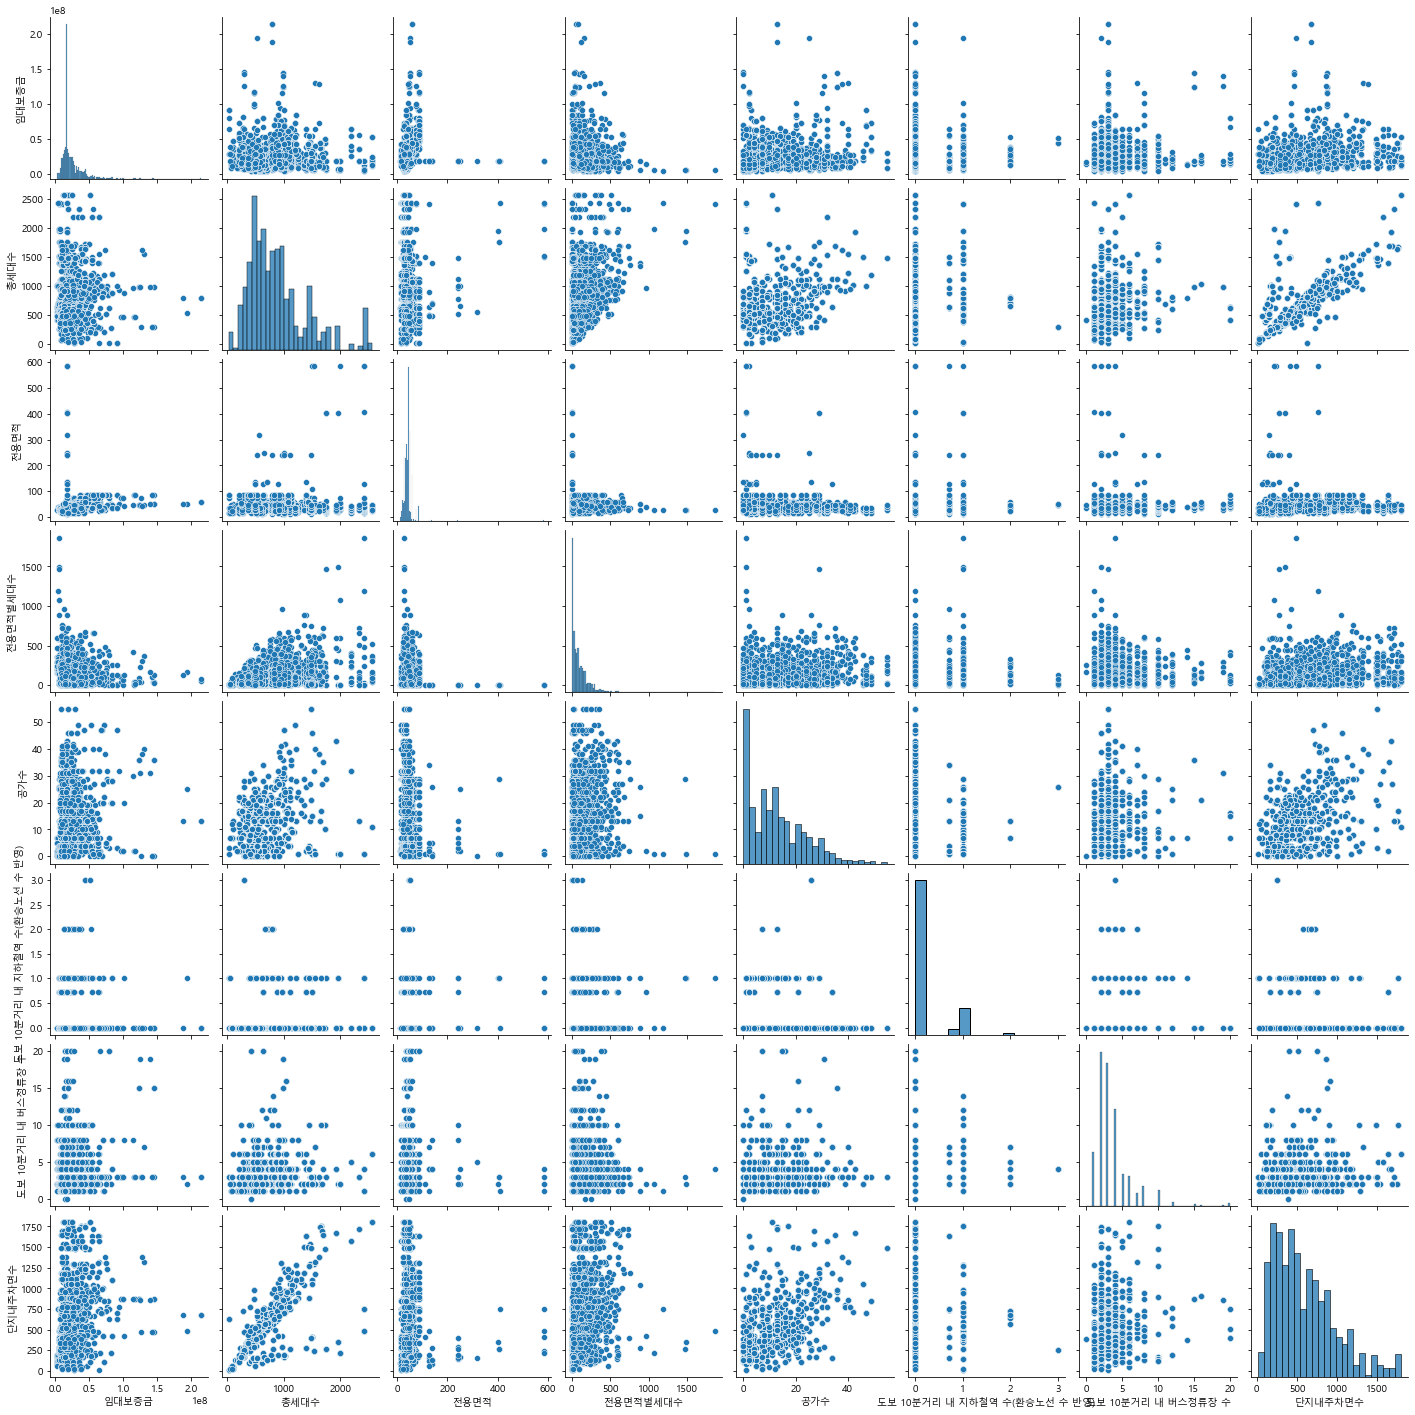

In [115]:
sns.pairplot(train_df[['임대보증금', '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', 
                       '공가수', '자격유형', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', 
                       '도보 10분거리 내 버스정류장 수', '단지내주차면수']])

In [91]:
sel = ["전용면적", "공가수", "도보 10분거리 내 지하철역 수(환승노선 수 반영)",
      "도보 10분거리 내 버스정류장 수", "단지내주차면수"]

In [130]:
sel = ['임대보증금', '총세대수', '전용면적', '전용면적별세대수', 
       '공가수', '자격유형', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', 
        '도보 10분거리 내 버스정류장 수', '단지내주차면수']

In [131]:
from sklearn.model_selection import train_test_split

X = train_df[sel]
y = train_df["임대보증금"]

test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=0)

In [132]:
test_df.isnull().sum(), train_df.isnull().sum()

(단지코드                              0
 총세대수                              0
 임대건물구분                            0
 지역                                0
 공급유형                              0
 전용면적                              0
 전용면적별세대수                          0
 공가수                               0
 자격유형                              0
 임대보증금                             0
 임대료                             180
 도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
 도보 10분거리 내 버스정류장 수                0
 단지내주차면수                           0
 dtype: int64,
 단지코드                              0
 총세대수                              0
 임대건물구분                            0
 지역                                0
 공급유형                              0
 전용면적                              0
 전용면적별세대수                          0
 공가수                               0
 자격유형                              0
 임대보증금                             0
 임대료                             569
 도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
 도보 10분거리 내 버스정류장 수    

In [133]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

now_time = time.time()

model_RF = RandomForestRegressor(n_estimators = 1000, 
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

ValueError: could not convert string to float: 'A'

In [117]:
model_RF.feature_importances_ 

array([0.39913897, 0.19385858, 0.01871558, 0.10363202, 0.28465486])

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수



RandomForestRegressor Score : 10155137.559861325


In [97]:
pred = model_RF.predict(test_X)

pred

array([15559894.  , 27482058.  , 26507534.  , ..., 37721419.75,
       43097498.  , 31016211.1 ])

In [107]:
len(pred)

1008

In [102]:
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거

test_new

,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,8,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0
2,17,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,19706000,156200,0.0,16.0,547.0
3,26,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,14418000,108130,0.0,3.0,543.0
4,30,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,28598000,203050,0.0,2.0,1112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,996,C2456,346,아파트,제주특별자치도,국민임대,26.44,24,17.0,H,6992000,117000,0.0,4.0,270.0
143,1000,C1266,591,아파트,충청북도,국민임대,26.94,164,35.0,H,8084000,149910,0.0,1.0,593.0
144,1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,17342000,-,0.0,1.0,40.0
145,1007,C1267,670,아파트,경상남도,국민임대,24.87,28,38.0,H,6882000,104370,0.0,1.0,467.0


In [ ]:
test_new2 = 

In [103]:
df_lease = pd.DataFrame({"단지코드": test_df["단지코드"],"임대보증금":pred})
df_lease

,단지코드,임대보증금
0,C1072,15559894.00
1,C1072,27482058.00
2,C1072,26507534.00
3,C1072,26507534.00
4,C1072,42712795.00
...,...,...
1017,C1267,36706907.50
1018,C2189,37721419.75
1019,C2189,37721419.75
1020,C2189,43097498.00
